In [1]:
import sys, os, glob
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import logging
from scipy.interpolate import UnivariateSpline, interp1d
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
from statsmodels.stats.libqsturng import psturng
import scipy.stats as stats

# logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.DEBUG)
logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.INFO)

%matplotlib inline
font = {'family' : 'Arial',
        'size'   : 7}
matplotlib.rc('font', **font)
plt.rcParams['svg.fonttype'] = 'none'

# Make a folder if it is not already there to store exported figures
!mkdir ../jupyter_figures

mkdir: ../jupyter_figures: File exists


In [2]:
# Read in measurements

df = pd.read_csv('../data/SMG-Cdh1-smFISH-quantification-summary/20171021-Cdh1-TMR-processingAll-Summary-4042-surface-layer-ROIs-14.txt', sep='\t')
df['area_type'] = ['Outer bud'] * len(df)
df['mRNA_density'] = df.inside_ROI / df.area_ROI * 100
df_OB1 = df
df

df = pd.read_csv('../data/SMG-Cdh1-smFISH-quantification-summary/20171021-Cdh1-TMR-processingAll-Summary-3531-bud-interior-ROIs-14.txt', sep='\t')
df['area_type'] = ['Inner bud'] * len(df)
df['mRNA_density'] = df.inside_ROI / df.area_ROI * 100
df_IB1 = df

df = pd.read_csv('../data/SMG-Cdh1-smFISH-quantification-summary/20171021-Cdh1-Atto655-processingAll-Summary-1598-surface-layer-ROIs.txt', sep='\t')
df['area_type'] = ['Outer bud'] * len(df)
df['mRNA_density'] = df.inside_ROI / df.area_ROI * 100
df_OB2 = df

df = pd.read_csv('../data/SMG-Cdh1-smFISH-quantification-summary/20171021-Cdh1-Atto655-processingAll-Summary-1526-bud-interior-ROIs.txt', sep='\t')
df['area_type'] = ['Inner bud'] * len(df)
df['mRNA_density'] = df.inside_ROI / df.area_ROI * 100
df_IB2 = df

df = pd.read_csv('../data/SMG-Cdh1-smFISH-quantification-summary/20170331-Cdh1-Quasar670-processingAll-Summary-9454-outer-layer-ROI.txt', sep='\t')
df['area_type'] = ['Outer bud'] * len(df)
df['mRNA_density'] = df.inside_ROI / df.area_ROI * 100
df_OB3 = df

df = pd.read_csv('../data/SMG-Cdh1-smFISH-quantification-summary/20170331-Cdh1-Quasar670-processingAll-Summary-4847-bud-interior-ROI.txt', sep='\t')
df['area_type'] = ['Inner bud'] * len(df)
df['mRNA_density'] = df.inside_ROI / df.area_ROI * 100
df_IB3 = df


2021-03-24 14:27:20,669 - INFO - NumExpr defaulting to 8 threads.


In [3]:
df_OB = pd.concat([df_OB1, df_OB2, df_OB3])
df_OB.reset_index(inplace=True)
# df_OB

df_IB = pd.concat([df_IB1, df_IB2, df_IB3])
df_IB.reset_index(inplace=True)
# df_IB


In [4]:
# Paired ttest for the outer bud and inner bud mRNA density (measurements are related)
stats.ttest_rel(df_OB.mRNA_density, df_IB.mRNA_density)

Ttest_relResult(statistic=-7.7816624547156135, pvalue=3.0234472707722813e-06)

In [5]:
df = pd.concat([df_OB1, df_IB1, df_OB2, df_IB2, df_OB3, df_IB3])
df.reset_index(inplace=True)
df

,index,file_name,selected_threshold,total_dot_number,inside_ROI,outside_ROI,area_ROI,area_type,mRNA_density
0,0,Cdh1-TMR_ctrl smFISH 1,14,1408,182,1226,4412.5884,Outer bud,4.124563
1,1,Cdh1-TMR_labeled smFISH 1,14,4953,402,4551,3237.6520,Outer bud,12.416405
2,2,Cdh1-TMR_labeled smFISH 2,14,1334,171,1163,5444.8957,Outer bud,3.140556
3,3,Cdh1-TMR_labeled smFISH 3,14,5964,304,5660,2976.5550,Outer bud,10.213149
4,0,Cdh1-TMR_ctrl smFISH 1,14,1408,290,1118,3456.3271,Inner bud,8.390410
5,1,Cdh1-TMR_labeled smFISH 1,14,4953,1072,3881,4855.3997,Inner bud,22.078512
6,2,Cdh1-TMR_labeled smFISH 2,14,1334,309,1025,4689.7894,Inner bud,6.588782
7,3,Cdh1-TMR_labeled smFISH 3,14,5964,1784,4180,7321.3586,Inner bud,24.367062
8,0,Cdh1-Atto655 smFISH 1,22,3166,257,2909,4276.4287,Outer bud,6.009687
9,1,Cdh1-Atto655 smFISH 2,22,2419,178,2241,3338.2670,Outer bud,5.332108


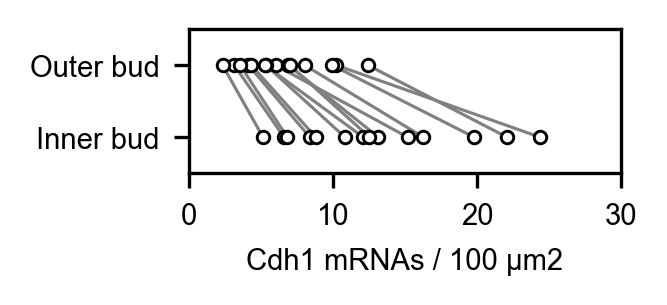

In [6]:
outputPrefix = 'Cdh1-smFISH-related-scatterplot'
outputFigPath = "../jupyter_figures/" + outputPrefix + ".svg"

fig_width=1.8
fig_height=0.6
fig = plt.figure(figsize=(fig_width,fig_height), dpi=300)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

# sns.swarmplot(df.area_type, df.mRNA_density)
for file_name in df.file_name.unique():
    df_temp = df[df.file_name == file_name]
    sns.lineplot(data=df_temp, y='area_type', x='mRNA_density',
                 size=1,
                 color='gray',
                 legend=False,
                 estimator=None,
                 sort=False)
    sns.swarmplot(data=df_temp,
                  size=3,
                  color='white',
                  edgecolor='black',
                  linewidth=.7,
                  y='area_type', x='mRNA_density')

# plt.ylim(0, 4)
plt.xlim(0, 30)

plt.xlabel('Cdh1 mRNAs / 100 µm2')
plt.ylabel(None)

for o in fig.findobj():
    o.set_clip_on(False)
for o in ax.findobj():
    o.set_clip_on(False)

if outputFigPath is not None:
    plt.savefig(outputFigPath)
